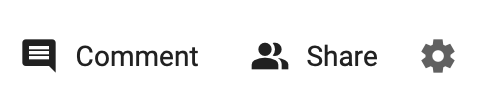

# Predicci√≥n de p√©rdida de clientes en Empresas de Servicios de Telecomunicaciones (Churn)

Reducir las salidas y [deserciones de clientes](https://www.bain.com/insights/breaking-the-back-of-customer-churn/) se ha convertido en una alta prioridad para la mayor√≠a de los proveedores de servicios de comunicaciones a medida que los mercados maduran y la competencia se intensifica.




En este documento usaremos una base de datos de una empresa de telecomunicaciones an√≥nima [disponibilizada por IBM](https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv).

El principal objetivo es crear un model de aprendizaje autom√°tico basado Regresi√≥n Log√≠stica (similar al propuesto [aqu√≠ con SVM](https://github.com/mmcuri/ds_handson/blob/master/Telecom_Churn_Prediction.ipynb)) para predecir la p√©rdida o salida de clientes en una empresa de telecomunicaciones.


## Librer√≠as

Importamos varias bibliotecas y m√≥dulos √∫tiles para el an√°lisis de datos y el aprendizaje autom√°tico en Python. A continuaci√≥n se describe cada uno de ellos:

- `pandas as pd`: Importa la biblioteca Pandas y la renombra como "pd". Pandas es una biblioteca popular utilizada para la manipulaci√≥n y an√°lisis de datos en Python.

- `numpy as np`: Importa la biblioteca NumPy y la renombra como "np". NumPy es una biblioteca de Python utilizada para realizar operaciones matem√°ticas en matrices y vectores.

- `matplotlib.pyplot as plt`: Importa la biblioteca Matplotlib y el m√≥dulo pyplot y lo renombra como "plt". Matplotlib es una biblioteca utilizada para la visualizaci√≥n de datos en Python.

- `from sklearn.metrics import classification_report`: Importa la funci√≥n classification_report desde el m√≥dulo metrics de la biblioteca scikit-learn. classification_report es una funci√≥n que calcula y muestra un informe de clasificaci√≥n detallado para un modelo de clasificaci√≥n.

- `from sklearn.metrics import confusion_matrix`: Importa la funci√≥n confusion_matrix desde el m√≥dulo metrics de la biblioteca scikit-learn. confusion_matrix es una funci√≥n que calcula y muestra la matriz de confusi√≥n para un modelo de clasificaci√≥n.

- `from sklearn.metrics import accuracy_score`: Importa la funci√≥n accuracy_score desde el m√≥dulo metrics de la biblioteca scikit-learn. accuracy_score es una funci√≥n que calcula y muestra la precisi√≥n de un modelo de clasificaci√≥n.

- `from sklearn.metrics import roc_auc_score`: Importa la funci√≥n roc_auc_score desde el m√≥dulo metrics de la biblioteca scikit-learn. roc_auc_score es una funci√≥n que calcula el √°rea bajo la curva ROC (AUC) para un modelo de clasificaci√≥n.

- `from sklearn.preprocessing import StandardScaler, LabelEncoder`: Importa las clases StandardScaler y LabelEncoder desde el m√≥dulo preprocessing de la biblioteca scikit-learn. StandardScaler es una clase utilizada para estandarizar los datos y LabelEncoder es una clase utilizada para codificar las etiquetas de clase en n√∫meros enteros.

- `from sklearn.model_selection import train_test_split`: Importa la funci√≥n train_test_split desde el m√≥dulo model_selection de la biblioteca scikit-learn. train_test_split es una funci√≥n que divide los datos en conjuntos de entrenamiento y prueba para su uso en el modelado predictivo.

En resumen, este c√≥digo importa varias bibliotecas y m√≥dulos que son √∫tiles para el an√°lisis de datos y el aprendizaje autom√°tico en Python.


In [2]:
# importing libraries
import pandas as pd #excel sofisticado
import numpy as np #matlab
import matplotlib.pyplot as plt #plots
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


## Base de datos

Este conjunto de datos contiene un total de 7043 clientes y 21 caracter√≠sticas de los mismos. De las entradas, 5174 son clientes activos y 1869 son clientes que la empresa ha perdido. Observe que el conjunto de datos est√° desbalanceado pues por cada cliente perdido existe casi 3 clientes activos. La variable de salida para nuestro modelo de machine learning ser√° `Churn`.

In [3]:
# importamos dataset
DATA_PATH = "https://raw.githubusercontent.com/mtgca/datasets_public/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)
#print(df)
# vemos las primeras 5 filas
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

### *Detalles de la base de datos*

*	`customerID` - Custumer unique identifier
*	`gender` - Customer gender - ['Female' 'Male']
*	`SeniorCitizen` - Elderly or retired person, a senior citizen is someone who has at least attained the age of 60 of 65 years
*	`Partner` - - ['No' 'Yes']
*	`Dependents` - If customer has dependents - ['No' 'Yes']
*	`Tenure` - Customer lifespan (in months)
*	`PhoneService` - - ['No' 'Yes']
*	`MultipleLines` - - ['No' 'No phone service' 'Yes']
*	`InternetService` - - ['No' 'No internet service' 'Yes']
*	`OnlineSecurity` - - ['No' 'No internet service' 'Yes']
*	`OnlineBackup` - - ['No' 'No internet service' 'Yes']
*	`DeviceProtection` - - ['No' 'No internet service' 'Yes']
*	`TechSupport` - - ['No' 'No internet service' 'Yes']
*	`StreamingTV` - - ['No' 'No internet service' 'Yes']
*	`StreamingMovies` -  - ['No' 'No internet service' 'Yes']
*	`Contract` - Type of contract - ['Month-to-month' 'One year' 'Two year']
*	`PaperlessBilling` - - ['No' 'Yes']
*	`PaymentMethod` - payment method - ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
*	`MonthlyCharges` - Monthly Recurring Charges
*	`TotalCharges` - Life time value
*	`Churn` - Churn value, the targer vector - ['No' 'Yes']





### *Limpieza del Dataset*

El c√≥digo presenta una serie de operaciones de preprocesamiento de datos en una base de datos que contiene informaci√≥n sobre clientes de una compa√±√≠a, incluyendo su g√©nero, edad, servicios contratados, pagos realizados, entre otros.

En primer lugar, se define la funci√≥n get_df_size para imprimir el n√∫mero de atributos y entradas de la base de datos.

Luego, se reemplazan los valores en blanco por NaN para facilitar el manejo de valores faltantes en la base de datos.

A continuaci√≥n, se reemplazan los valores faltantes en la columna 'TotalCharges' por la mediana de esa columna y se convierte esa columna al tipo num√©rico.

Despu√©s, se elimina la columna 'customerID' ya que no es una caracter√≠stica relevante.

A continuaci√≥n, se codifican las caracter√≠sticas binarias en 0's y 1's usando LabelEncoder y se imprimen las categor√≠as correspondientes a cada una de estas caracter√≠sticas.


In [4]:
def get_df_size(df, header='Dataset dimensions'):
  print(header,
        '\n# Attributes: ', df.shape[1],
        '\n# Entries: ', df.shape[0],'\n')

get_df_size(df)

#df.info()

# reemplaza valores en blanco por NaN
df_clean = df.replace(r'^\s*$', np.nan, regex=True)

# Convert 'TotalCharges' to numeric before calculating the median.
# errors='coerce' will handle any non-numeric values by setting them to NaN.
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# reemplaza valores faltantes en TotalCharges por la mediana de TotalCharges.
total_charges_median = df_clean.TotalCharges.median()
df_clean['TotalCharges'].fillna(total_charges_median, inplace=True)
df_clean['TotalCharges'] = df_clean['TotalCharges'].apply(pd.to_numeric)

#CustomerID lo retiramos porque no es una caracter√≠stica
df_clean = df_clean.drop('customerID', axis=1)
df_clean.describe()

print("Churn No Instances: ", df_clean[df_clean['Churn'] == 'No'].shape[0])
print("Churn Yes Instances: ", df_clean[df_clean['Churn'] == 'Yes'].shape[0])

binary_feat = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
numeric_feat = [col for col in df_clean.select_dtypes(['float','int']).columns.tolist() if col not in binary_feat]
categorical_feat = [ col for col in df_clean.select_dtypes('object').columns.to_list() if col not in binary_feat + numeric_feat ]
df_proc = df_clean.copy()
#Etiquetas para caracter√≠sticas binarias
le = LabelEncoder()
for i in binary_feat:
  df_proc[i] = le.fit_transform(df_proc[i])
  print(i, '\n', np.unique(df_proc[i].values))
#Dummy variables
df_proc = pd.get_dummies(df_proc, columns=categorical_feat)
get_df_size(df, header='Original dataset:')
get_df_size(df_proc, header='Processed dataset:')
df_proc.head()


Dataset dimensions 
# Attributes:  21 
# Entries:  7043 

Churn No Instances:  5174
Churn Yes Instances:  1869
gender 
 [0 1]
SeniorCitizen 
 [0 1]
Partner 
 [0 1]
Dependents 
 [0 1]
PhoneService 
 [0 1]
PaperlessBilling 
 [0 1]
Churn 
 [0 1]
Original dataset: 
# Attributes:  21 
# Entries:  7043 

Processed dataset: 
# Attributes:  41 
# Entries:  7043 



gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   StreamingMovies_No  StreamingMovies_No internet service  \
0                True                                False   
1                True                                False   
2                True                                False   
3                True                                False   
4                True                                False   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                False                     True              False   
1                False                    False               True   
2                False                     True              False   
3                False                    False               True   
4                False                     True              False   

   Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0              False                                    False   
1              False                                    False   
2              False                                    False   
3              False                                     True   
4              False                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 41 columns]

### *Divisi√≥n en conjunto de entrenamiento y test*

En el c√≥digo, se divide el conjunto de datos df_proc en caracter√≠sticas y variable objetivo X e y, respectivamente. Luego, se realiza una divisi√≥n de los datos en conjuntos de entrenamiento y prueba utilizando la funci√≥n train_test_split de scikit-learn. Los conjuntos de entrenamiento y prueba se almacenan en X_train, X_test, y_train y y_test. La divisi√≥n se realiza de manera estratificada para asegurar que la proporci√≥n de instancias positivas y negativas en la variable objetivo se mantenga en ambos conjuntos. Se utiliza una proporci√≥n de 80/20 para los conjuntos de entrenamiento y prueba, respectivamente, y se fija una semilla aleatoria (random_state) en 42 para asegurar que los resultados sean reproducibles.

In [5]:
# dividimos df_proc en caracter√≠sticas y salida
X=df_proc.drop('Churn', axis=1)
y=df_proc['Churn']

# Dividimos el conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

### *Balanceo de datos*

Este c√≥digo realiza el submuestreo (undersampling) de un conjunto de datos desbalanceado en t√©rminos de la variable objetivo. El submuestreo se utiliza para abordar el problema del desequilibrio de clases en el conjunto de datos, donde una o varias clases tienen muchas menos observaciones que las otras clases. En este caso, el modelo de aprendizaje autom√°tico puede estar sesgado hacia la clase mayoritaria, lo que puede resultar en un rendimiento deficiente en la clasificaci√≥n de la clase minoritaria.

El submuestreo implica reducir el n√∫mero de observaciones en la clase mayoritaria para equilibrar la distribuci√≥n de las clases en el conjunto de datos. Esto puede mejorar el rendimiento del modelo en la clasificaci√≥n de la clase minoritaria y reducir el sesgo hacia la clase mayoritaria.

La biblioteca imblearn se utiliza para realizar el submuestreo, y en este caso se importa la clase RandomUnderSampler. El objeto RandomUnderSampler se inicializa con random_state=1, lo que garantiza que los resultados ser√°n reproducibles.

Luego, el submuestreo se realiza en el conjunto de entrenamiento (X_train, y_train) mediante el m√©todo fit_resample del objeto rus. Los datos submuestreados se almacenan en X_train_rus y y_train_rus.

Para evaluar el efecto del submuestreo, se utiliza la funci√≥n get_df_size, que devuelve el tama√±o del conjunto de datos. Primero se imprime el tama√±o del conjunto de entrenamiento original (X_train, y_train) antes del submuestreo, y luego se imprime el tama√±o del conjunto submuestreado (X_train_rus, y_train_rus) despu√©s de aplicar el submuestreo.

Finalmente, se utiliza la funci√≥n np.unique para verificar que las categor√≠as de la variable objetivo (y_train_rus) est√©n balanceadas. La funci√≥n devuelve una tupla que contiene las categor√≠as √∫nicas y el n√∫mero de instancias en cada categor√≠a. Al utilizar return_counts=True, se garantiza que se devuelvan los recuentos de las categor√≠as.

In [6]:
# submuestreo -> under sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)
get_df_size(X_train, header='Before balancing:')
get_df_size(X_train_undersampled, header='After balancing:')

# verificamos que las categorias est√©n balanceadas
np.unique(y_train_undersampled, return_counts=True)


Before balancing: 
# Attributes:  40 
# Entries:  5634 

After balancing: 
# Attributes:  40 
# Entries:  2990 



(array([0, 1]), array([1495, 1495], dtype=int64))

## Modelo de Machine Learning

Este c√≥digo construye un modelo de regresi√≥n log√≠stica para un conjunto de datos y lo eval√∫a en un conjunto de datos de prueba y de entrenamiento.

Primero, se define una tuber√≠a (pipeline) que encadena tres pasos:

PolynomialFeatures(degree=2): Crea una matriz de caracter√≠sticas polin√≥micas de grado 2 a partir de las caracter√≠sticas originales.
StandardScaler(): Estandariza las caracter√≠sticas.
LogisticRegression(max_iter=20000, penalty='l2', C=1/lambda_value): Ajusta un modelo de regresi√≥n log√≠stica a los datos, utilizando una regularizaci√≥n L2 (Ridge) y un par√°metro de regularizaci√≥n C inversamente proporcional a lambda_value.
Luego, el modelo se entrena en un conjunto de datos de entrenamiento (X_train_undersampled e y_train_undersampled) utilizando el m√©todo fit.

A continuaci√≥n, el modelo se eval√∫a en un conjunto de datos de prueba (X_test e y_test). Las predicciones se obtienen con el m√©todo predict y se calcula la precisi√≥n (accuracy) utilizando metrics.accuracy_score. La precisi√≥n en el conjunto de datos de prueba se almacena en la variable acc_test y se imprime en pantalla.

Finalmente, se eval√∫a el modelo en el conjunto de datos de entrenamiento (X_train_undersampled e y_train_undersampled) y se almacena la precisi√≥n en la variable acc_train, que tambi√©n se imprime en pantalla.

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics

lambda_value = 0.1
model_logreg =  Pipeline([
                ('polynomial_features', PolynomialFeatures(degree=2)), #no cambiar
                ('scaler', StandardScaler()),
                ('logistic_regression', LogisticRegression(max_iter=20000, penalty='l2', C=1/lambda_value))
 ])

# training
model_logreg.fit(X_train_undersampled, y_train_undersampled)

# evaluation on test set
pred_test = model_logreg.predict(X_test)
acc_test = metrics.accuracy_score(y_test, pred_test)
print("Accuracy on test set Logistic Regression: ", acc_test)
# evaluation on training set
pred_train = model_logreg.predict(X_train_undersampled)
acc_train = metrics.accuracy_score(y_train_undersampled, pred_train)
print("Accuracy on training set Logistic Regression: ", acc_train)

Accuracy on test set Logistic Regression:  0.7345635202271115
Accuracy on training set Logistic Regression:  0.8003344481605351


## ‚úÖ Actividad

En esta actividad se debe obtener una gr√°fica cuyo eje x es el hiperpar√°metro de regularizaci√≥n lambda (variable lambda_value) y cuyo eje de las ordenadas es el accuracy. Su gr√°fica debe mostrar tanto el accuracy en el conjunto de entrenamiento como en el conjunto de validaci√≥n. Use los siguientes valores (sugerencia) para lambda  [ 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1e3, 1e4]. Haga la escala del eje x logar√≠tmica para visualizar mejor sus resultados. Para esto, usted debe a√±adir plt.xscale('log') en su c√≥digo al momento de graficar. Observe el siguiente ejemplo de gr√°fica con escala logar√≠tmica en el eje x. Analice el gr√°fico y determine cu√°l cree que ser√≠a el valor √≥ptimo de lambda. Use GridSearchCV con k=5 folds. Finalmente, eval√∫e su modelo optimizado (i.e, el modelo con el lambda_value que produce el mejor desempe√±o en el conj. de validaci√≥n) en el conjunto de test. Esta actividad puede **demorar en ejecutar**

Mejor valor de lambda encontrado: 1000.0


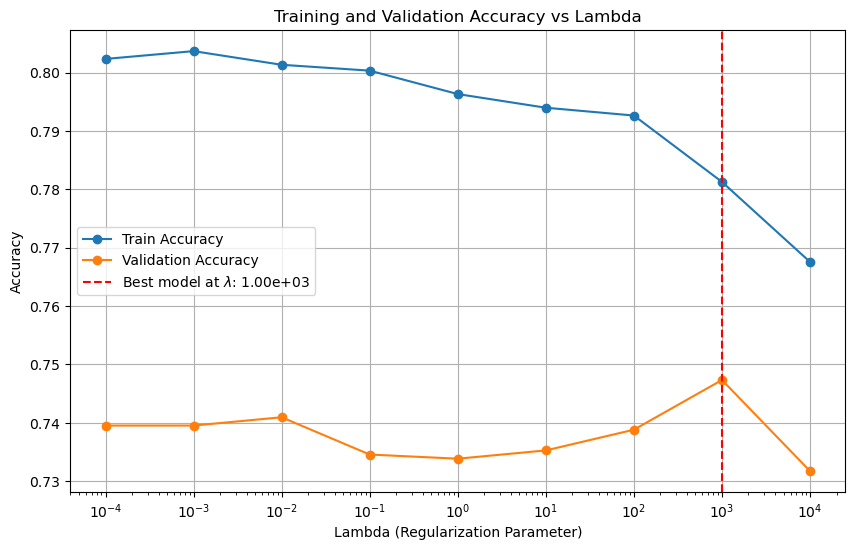

Accuracy en el conjunto de test con el mejor modelo:  0.7473385379701917


In [8]:
from sklearn.model_selection import GridSearchCV

# Definir los valores de lambda
lambda_values = [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1e3, 1e4]
train_accuracies = []
val_accuracies = []

# Iteramos sobre cada valor de lambda
for lambda_value in lambda_values:
    # Definimos el modelo con el valor actual de lambda
    model_logreg = Pipeline([
        ('polynomial_features', PolynomialFeatures(degree=2)), #no cambiar
        ('scaler', StandardScaler()),
        ('logistic_regression', LogisticRegression(max_iter=20000, penalty='l2', C=1/lambda_value))
    ])

    # Entrenamos el modelo con el conjunto de entrenamiento balanceado
    model_logreg.fit(X_train_undersampled, y_train_undersampled)

    # Calculamos el accuracy en el conjunto de entrenamiento y validaci√≥n
    train_accuracy = model_logreg.score(X_train_undersampled, y_train_undersampled)
    val_accuracy = model_logreg.score(X_test, y_test)

    # Almacenamos los valores en las listas
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(lambda_values, val_accuracies, label='Validation Accuracy', marker='o')
plt.xscale('log')  # Escala logar√≠tmica en el eje x
plt.xlabel('Lambda (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Lambda')
plt.legend()
plt.grid(True)

# Encontrar el mejor valor de lambda con GridSearchCV
param_grid = {'logistic_regression__C': [1/lambda_value for lambda_value in lambda_values]}
grid_search = GridSearchCV(model_logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_undersampled, y_train_undersampled)

# Mejor par√°metro lambda encontrado
best_lambda = 1 / grid_search.best_params_['logistic_regression__C']
print(f"Mejor valor de lambda encontrado: {best_lambda}")

# Evaluar el modelo optimizado en el conjunto de test
best_model = grid_search.best_estimator_
plt.axvline(x=best_lambda, color='r', linestyle='--', label=f'Best model at $\lambda$: {best_lambda:.2e}')
plt.legend()
plt.show()
test_accuracy = best_model.score(X_test, y_test)
print("Accuracy en el conjunto de test con el mejor modelo: ", test_accuracy)


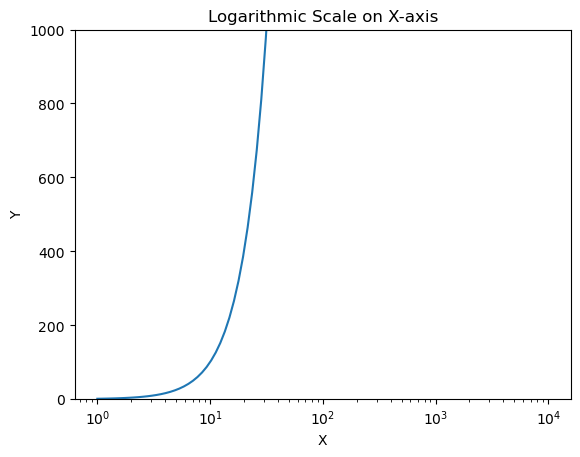

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
x = np.logspace(0, 4, 100)
y = x ** 2

# Create the plot
plt.plot(x, y)
plt.xscale('log') # Set logarithmic scale on x-axis
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Logarithmic Scale on X-axis')
plt.ylim(0, 1000)
plt.show()
# Set limit for y-axis


# ‚úÖ Conclusiones
Concluya su trabajo con sus principales observaciones obtenidas de los resultados de sus experimentos.


- La regularizaci√≥n juega un papel importante en la capacidad de generalizaci√≥n del modelo. Encontrar el valor √≥ptimo de ùúÜ permite obtener un modelo con un buen equilibrio entre precisi√≥n y robustez frente a datos nuevos. Este an√°lisis es crucial en aplicaciones pr√°cticas, donde los modelos demasiado complejos pueden ser sensibles al ruido y los modelos demasiado simples pueden no capturar patrones importantes.

- Pese a que en el conjunto de datos de entrenamiento para determinados valores de lambda se obtiene una mejor precision esto no siempre funcion para el conjunto de datos de prueba esto es debido a una combinaci√≥n de sobreajuste, diferencias en la distribuci√≥n de datos entre los conjuntos, y el equilibrio entre sesgo y varianza. Encontrar el valor adecuado de
ùúÜ permite que el modelo generalice mejor y disminuya la diferencia de precisi√≥n entre los conjuntos de entrenamiento y de prueba, optimizando su rendimiento en datos no vistos.

- Evaluar diferentes valores de ùúÜ es esencial para entender el impacto de la regularizaci√≥n en el modelo y encontrar el balance adecuado entre sesgo y varianza.

